# Data Generation of FHN

In [1]:
import os
import sys
import time
import math
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

sys.path.append("../SVAE/ODE")
from model import FitzHughNagumo
from scheme import EulerScheme, RungeKuttaScheme

## generation (Euler, Runge Kutta)

In [5]:
## setting
seed = 128
np.random.seed(seed)
n_sample = 400
a = 0.7
b = 0.8
c = 0.08
def I(t):
    return 1
dt = 0.01
T = 3000
ds = 15 # down sampling
Tds = int(T/ds)
sys_sd = 0.
obs_sd = 0.1
start = 750

model = FitzHughNagumo(a*b, a*c, 1, I)
system = RungeKuttaScheme(dt, T, model, seed=seed)

true = np.zeros((n_sample, T, 2), dtype=np.float32)
obs = np.zeros((n_sample, T, 2), dtype=np.float32)

for i in range(n_sample):
    print("\r sample={}/{}".format(i, n_sample), end="")
    initial = np.random.uniform(-3, 3, size=2)
    true[i], obs[i] = system.noise_added_simulation(initial, sys_sd, obs_sd)
    #true[i] = system.perfect_simulation(initial, sys_sd, obs_sd)

 sample=399/400

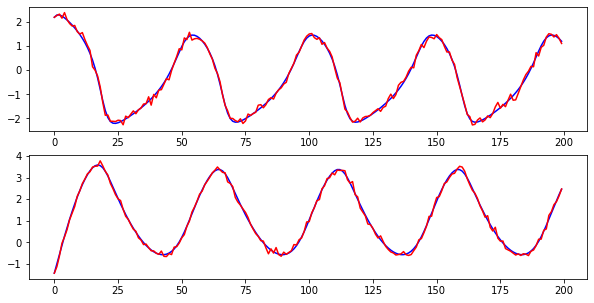

In [6]:
fig, ax = plt.subplots(2,1,figsize=(10,5))

for i in range(2):
    ax[i].plot(true[0,::ds,i], label="true", linestyle="-", c="b")
    ax[i].plot(obs[0,::ds,i], label="obs", linestyle="-", c="r")

In [7]:
np.save("FHN/FHN_rk_true_ns400_dt001_T3000_ds15_ssd0_osd01.npy", true[:,::ds])
np.save("FHN/FHN_rk_obs0_ns400_dt001_T3000_ds15_ssd0_osd01.npy", 
        obs[:,::ds,0].reshape(n_sample, Tds, 1))

## データロード

In [3]:
true = np.load("FHN/FHN_rk_true_ns100_dt001_T3000_ds15_ssd0_osd01.npy")
obs = np.load("FHN/FHN_rk_obs0_ns100_dt001_T3000_ds15_ssd0_osd01.npy")

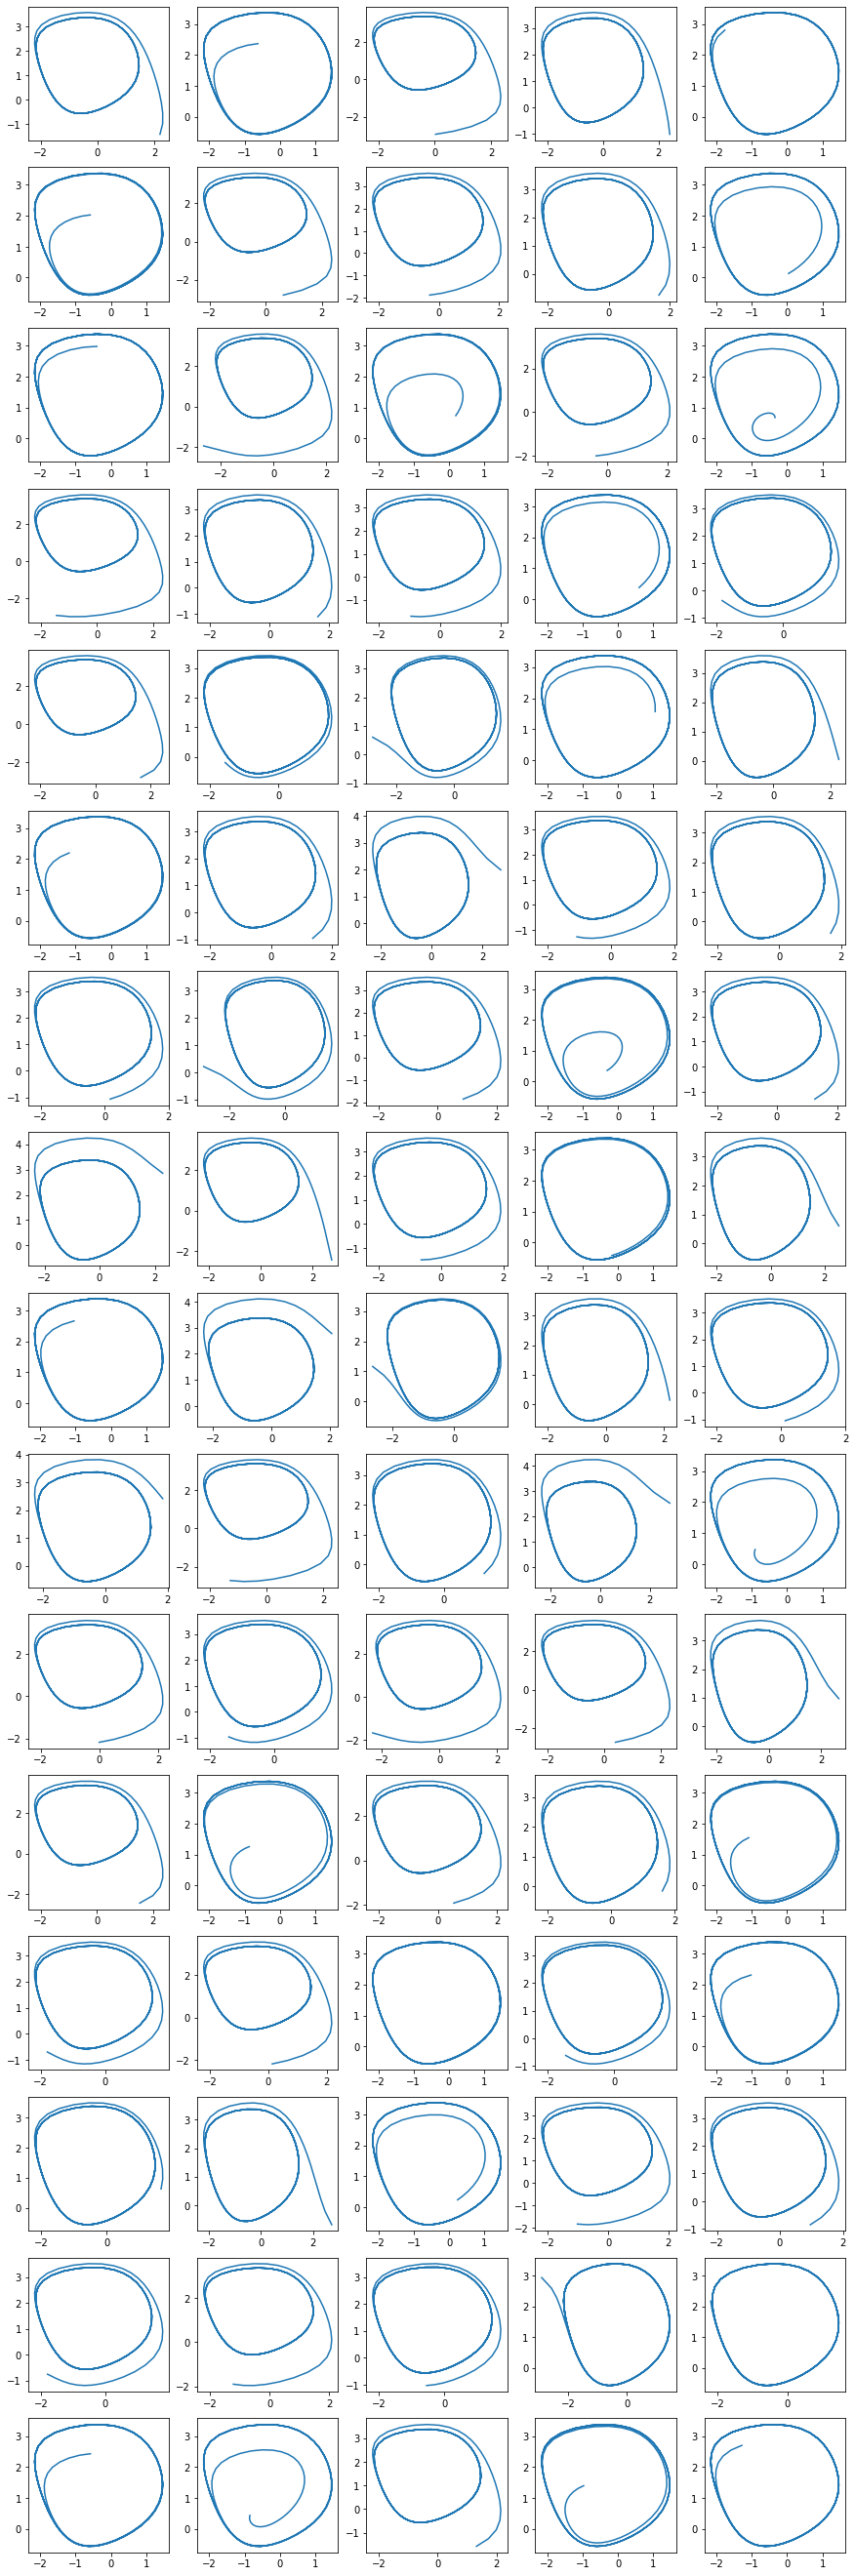

In [4]:
fig, ax = plt.subplots(16, 5, figsize=(5*3, 16*3))

for i in range(80):
    i0 = i//5
    i1 = i%5
    ax[i0,i1].plot(true[i,:,0], true[i,:,1], label="true")